# Problem 1: Null distributions of a one-sample vs two sample t

We've spent a lot of time discussing the "null distribution".
- The null hypothesis for a 1 sample t test is that the mean of the normal population our data comes from is equal to our hypothesized mean, $\mu$. Therefore, the null distribution is the distribution of t values we expect to observe if we randomly sample from a normal population that has a mean equal to our hypothesized mean, $\mu$.
- The null hypothesis for a 2 sample t test can be more nuanced, depending on the assumptions we make about each samples standard deviations. Here, we will consider the independent, equal sample size, equal variance two-sample t test.

## Confirm we can calculate t correctly

Let's start by firsting making sure we can calculate t correctly. For this problem, let's use the heights of players (in centimeters) randomly selected from the LA Lakers and Boston Celtics rosters:

Lakers = [200, 210, 220,225,215];

Heat = [190, 220, 193, 200, 190];

In the space below, calculate the 1 sample t value for the Lakers, assuming their average height is 195 cm, and the two-sample t value for this data. Confirm your answers using ttest_1samp and ttest_ind. Be sure to **note** the technicality discussion on the last slide of Lecture 11.

In [1]:
import numpy as np
import scipy
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import stats
import random

In [2]:
mu = 195.
lakers = [200, 210, 220,225,215]
heat = [190, 220, 193, 200, 190]

slake = np.std(lakers,ddof=1)
sheat = np.std(heat,ddof=1)
avel = np.sum(lakers)/len(lakers)
aveh = np.sum(heat)/len(heat)

tlake1 = (mu-avel)/slake

#Two sided data
sp = np.sqrt((slake**2+sheat**2)/2)
t2 = (avel-aveh)/(sp*np.sqrt(2/len(lakers)))

print('My calculated one-sided t value for the lakers sample is', tlake1)
print('My calculated two-sided t value is', t2)

My calculated one-sided t value for the lakers sample is -1.9755259306581383
My calculated two-sided t value is 2.167939197635687


In [3]:
#Scipy Function Confirmation
print(scipy.stats.ttest_1samp(lakers,mu))
print(scipy.stats.ttest_ind(lakers,heat,alternative='two-sided'))

Ttest_1sampResult(statistic=4.4174102722651325, pvalue=0.011534048799787354)
Ttest_indResult(statistic=2.167939197635687, pvalue=0.06201738353641719)


There is likely some discrepency in the ttest_1samp result from my answer because the 1samp function uses the corrected sample standard deviation.

## Compare t distributions for 1 and 2 sample tests

- In the space below, write the code necessary to create null distributions for single and two-sample t tests when:
    - For the single sample t test, you are collecting 9 samples
    - For the two sample t test, you are collected 5 samples for each group.
- Produce density plots to compare the two distributions.
    - Be sure to select enough samples and to adjust bins sizes as needed so that the density plots are clear and stable (meaning each time you run it, you basically get the same answer).
    - Can use density feature of plt.hist or Seaborn's  sns function.
    - On the figure, clearly indicate the degrees of freedom for the specific t test
    - Unclear figures will not receive credit.


In [4]:
#Using code from class 4:
mu1 = 195
sigma = 10
norm_data=np.random.normal(mu,sigma,50000)
n=0

t1 = np.zeros(1000)
t2 = np.zeros(1000)


while n<1000:
    sam1 = random.sample(list(norm_data),9)
    sam2 = random.sample(list(norm_data),5)
    sam3 = random.sample(list(norm_data),5)
    xbar1 = np.sum(sam1)/len(sam1)
    xbar2 = np.sum(sam2)/len(sam2)
    xbar3 = np.sum(sam3)/len(sam3)
    s1 = np.std(sam1,ddof=1)
    s2 = np.std(sam2,ddof=1)
    s3 = np.std(sam3,ddof=1)
    
    sp = np.sqrt((s2**2+s3**2)/2)
    
    t1[n] = (xbar1-mu1)/s1
    t2[n] = (xbar2-xbar3)/(sp*np.sqrt(2/5))
    
    n=n+1
    


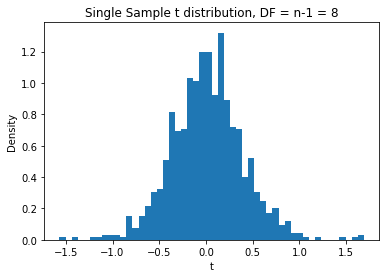

In [5]:
plt.hist(t1,density = True, bins = 50);
plt.title('Single Sample t distribution, DF = n-1 = 8')
plt.ylabel('Density');
plt.xlabel('t');

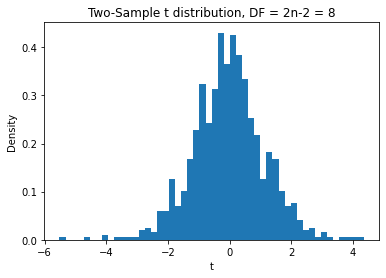

In [6]:
plt.hist(t2,density = True, bins = 50);
plt.title('Two-Sample t distribution, DF = 2n-2 = 8')
plt.ylabel('Density');
plt.xlabel('t');

Based on your figure(s) above, how do the two distributions compare? **Comment here:**

The single-value test has a density peak above 1.0 while the two-sample t test has a density peak below 0.5. The degrees of freedom end up being equivalent in each scenario based on sample sizes. The distribution of the two sample test is spread out over a larger range of t's (-4 to 4) while the single sample t test is distributed between -1 and 1 mostly.

## Compute p value for two-sample t test
- Using your null t distribution for your two sample t test, what is the likelihood that the heights of the Lakers and Heat come from populations with the same means?
- Check your answer using ttest_ind

In [7]:
print(scipy.stats.ttest_ind(lakers,heat,alternative='two-sided'))

Ttest_indResult(statistic=2.167939197635687, pvalue=0.06201738353641719)


The above result indicates that the likelihood that these two team samples came from a population with the same mean is very low. A p-value of 0.06 indicates that the chances of achieving the same mean if ouor null hypothesis were true are slim.

# Problem 2 Changing our data's distributions

As we've seen, we typically must assume that our data comes from a normal distribution. Let's use our brute force approach to determine how changing that assumption impacts our null t distributions.

- Below, create the null t distributions for a single-sample t test for n = 3, 8 and 30 when sampling from a normal distribution and a uniform distribution. 
- For each case, plot the density plots such that you can compare the distributions that result from sampling the normally and uniformally distributed data.
- Clearly label all figures.

## Normal Distribution

In [8]:
norm_data2=np.random.normal(mu1,sigma,50000)
t4=np.zeros(1000)
t5=np.zeros(1000)
t6=np.zeros(1000)
n=0

while n<1000:
    sam4 = random.sample(list(norm_data2),3)
    sam5 = random.sample(list(norm_data2),8)
    sam6 = random.sample(list(norm_data2),30)
    xbar4=np.sum(sam4)/len(sam4)
    s4=np.std(sam4,ddof=1)
    xbar5=np.sum(sam5)/len(sam5)
    s5=np.std(sam5,ddof=1)
    xbar6=np.sum(sam6)/len(sam6)
    s6=np.std(sam6,ddof=1)
    t4[n] = (xbar4-mu1)/s4
    t5[n] = (xbar5-mu1)/s5
    t6[n] = (xbar6-mu1)/s6
    n=n+1
    


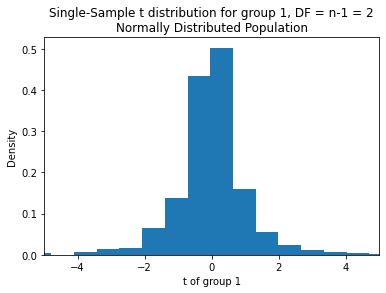

In [18]:
#Plotting the data for a sampple size of n=3
plt.hist(t4,density = True, bins = 100);
plt.title('Single-Sample t distribution for group 1, DF = n-1 = 2\nNormally Distributed Population')
plt.ylabel('Density');
plt.xlabel('t of group 1');
plt.xlim([-5,5]);

**Comment here** on how changing distributions from which our data is collected impacts the null t distribution.

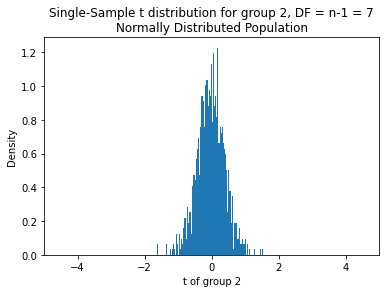

In [19]:
#Plotting the data for a sampple size of n=8
plt.hist(t5,density = True, bins = 100);
plt.title('Single-Sample t distribution for group 2, DF = n-1 = 7\nNormally Distributed Population')
plt.ylabel('Density');
plt.xlabel('t of group 2');
plt.xlim([-5,5]);

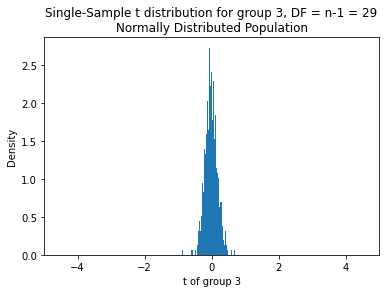

In [20]:
#Plotting the data for a sampple size of n=30
plt.hist(t6,density = True, bins = 100);
plt.title('Single-Sample t distribution for group 3, DF = n-1 = 29\nNormally Distributed Population')
plt.ylabel('Density');
plt.xlabel('t of group 3');
plt.xlim([-5,5]);

## Uniform Distribution

In [22]:
norm_data3=np.random.uniform(mu1,sigma,50000)
t7=np.zeros(1000)
t8=np.zeros(1000)
t9=np.zeros(1000)
n=0

while n<1000:
    sam7 = random.sample(list(norm_data3),3)
    sam8 = random.sample(list(norm_data3),8)
    sam9 = random.sample(list(norm_data3),30)
    xbar7=np.sum(sam7)/len(sam7)
    s7=np.std(sam7,ddof=1)
    xbar8=np.sum(sam8)/len(sam8)
    s8=np.std(sam8,ddof=1)
    xbar9=np.sum(sam9)/len(sam9)
    s9=np.std(sam9,ddof=1)
    t7[n] = (xbar7-mu1)/s7
    t8[n] = (xbar8-mu1)/s8
    t9[n] = (xbar9-mu1)/s9
    n=n+1
    


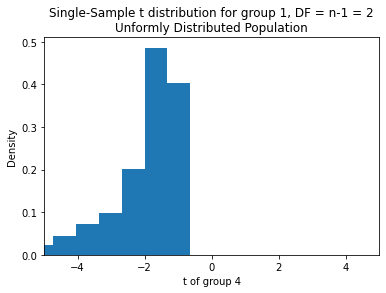

In [23]:
#Plotting the data for a sample size of n=3
plt.hist(t7,density = True, bins = 100);
plt.title('Single-Sample t distribution for group 4, DF = n-1 = 2\nUniformly Distributed Population')
plt.ylabel('Density');
plt.xlabel('t of group 4');
plt.xlim([-5,5]);

**Comment here** on how changing distributions from which our data is collected impacts the null t distribution.

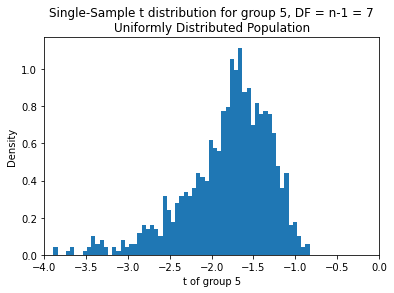

In [27]:
#Plotting the data for a sampple size of n=8
plt.hist(t8,density = True, bins = 100);
plt.title('Single-Sample t distribution for group 5, DF = n-1 = 7\nUniformly Distributed Population')
plt.ylabel('Density');
plt.xlabel('t of group 5');
plt.xlim([-4,0]);

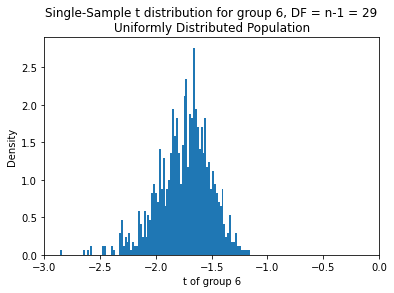

In [26]:
#Plotting the data for a sampple size of n=30
plt.hist(t9,density = True, bins = 100);
plt.title('Single-Sample t distribution for group 6, DF = n-1 = 29\nUniformly Distributed Population')
plt.ylabel('Density');
plt.xlabel('t of group 6');
plt.xlim([-3,0]);

When calculating the same statistics for a unform distribution, the plots still decrease their range. However, these t distributinos now are centered around negative t values rather than zero. As the sample size increases, the t distribution peak value appears to occur gradually closer to zero.

# Problem 3 U statistic (i.e. no distribution assumptions)

One major concern is that we often know nothing about the data. We have no good reason to assume it is from a normal distribution. Instead, we have to use nonparametric statistical tools wherein we do not have to make any assumptions on whether our data comes from a specific population. One option is the U statistic from the Wilcoxon rank-sum test.

The assumption here is that two independent samples were selected from populations having the same distribution, but we don't know what that distribution is.

How to calculate U for small data sets (i.e. direct method)
- U is the number of “wins” between two competing datasets
- For each observation in one set, count the number of times this first value wins over any observations in the other set.
- Count 0.5 for any ties
- The sum of wins and ties is the U for that datasets
- To keep our discussion simple, we will ignore the case of ties

Here's a short example:
- Jason and Mr. N are competing. Jason scores a 100, 55, and 50. Mr. N scores a 90, 80, 60.
- Order the data by wins from highest to lowest and indicate who the score belongs to : J N N N J J
- We can calculate the U for Jason (call it U1) by adding the number of wins for each J entry. Namely, the first J beats N 3 times while the second and third J have no wins. So we get U1 = 3 + 0 + 0.
    - We can do the same calculation for Mr. N and get U2 = 2 + 2 + 2 = 6.
- Now, all we need to interpret these numbers is our absolute favorite thing: **a null distribution!!**

The null distribution for a U statistic is simply the score all of the **possible combinations of outcomes**. For example, if we only had two measurements for J and N, the possible combinations are:
   - JJBB (U1 = 4)
   - JBJB (U1 = 3)
   - JBBJ (U1 = 2)
   - BJBJ (U1 = 1)
   - BBJJ (U1 = 0)
   - BJJB (U1 = 2)

A histogram of the U1's above would be our null distribution. 

In the space below, write the code to construct the null distribution of U1 for when 5 samples are collected for each group. Hint: look for packages that can identify all combinations of two vectors...


In [155]:
import itertools
from itertools import permutations

In [199]:
a = [7,1,2,8,10]
b = [4,5,6,9,11]
combinedmeas = a+b

myas = list(np.ones(len(a)))
mybs = list(np.zeros(len(b)))
myas.extend(mybs)

In [211]:
permutations = list(itertools.permutations(myas))
for i in range(len(permutations)):
    permutations[i] = list(permutations[i])

In [248]:
iscore=np.zeros(len(permutations))
iteration = 0
for i in range(len(permutations)):
# for i in range(2):
    counter = 0
    n=0
    for j in range(10):
        if permutations[i][j] == 1.:
            n = j+1
            while n < 10:
                if permutations[i][j] >= permutations[i][n]:
                    counter += 1
                    n+=1

    iscore[iteration] = counter
    iteration+=1


#print(iscore)

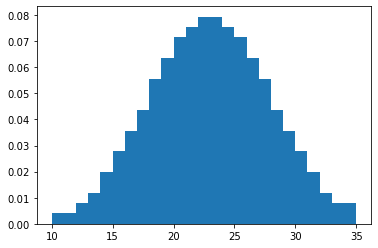

In [243]:
plt.hist(iscore,density = True, bins = 25);

You collect two samples:

a = (7,1,2,8,10)
b = (4,5,6,9,11)

Use your distribution to estimate the likelihood (two-sided p value) that a and b come from the same distributions.


In [258]:
#Stats of the normalized scores from above:
umu=np.sum(iscore)/len(iscore)
mysum=0
for i in range(len(iscore)):
    mysum += (iscore[i]-umu)**2
    
usigma = np.sqrt(mysum/len(iscore))

xbara = np.sum(a)/len(a)
sa=np.std(a,ddof=1)
xbarb = np.sum(b)/len(b)
sb=np.std(b,ddof=1)
sed = np.sqrt(sa**2 + sa**2)
myt = (xbara-xbarb)/sed
df = len(a)+len(b)-2

myp = (1 - scipy.stats.t.cdf(abs(myt), df)) * 2

print('The p-value obtained when evaluating the continuous distribution function is:',myp)

The p-value obtained when evaluating the continuous distribution function is: 0.80658421785117


This relatively high p-value means that the probability that these two samples came from the same population is high.